In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data/Model_Training_Times_Simulation_Dataset.csv')
df.shape

(10000, 10)

In [3]:
df.head()

,CPU_Cores,RAM_GB,GPU_Available,GPU_VRAM_GB,Disk_Speed_MBps,Dataset_Size_MB,Num_Features,Model_Complexity,CV_Folds,Training_Time_Seconds
0,8,21,0,0,1494.386708,5397,279,4.473928,5,125.479184
1,21,50,1,7,1283.076010,3757,371,6.522171,3,27.255136
2,30,73,0,0,1020.495516,5209,154,8.760074,6,115.037069
3,16,60,1,15,435.405298,372,598,9.104246,9,74.369815
4,12,96,1,17,1625.977260,2995,138,1.283650,9,3.471474


In [4]:
df.isna().any().sum()

0

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   CPU_Cores              10000 non-null  int64  
 1   RAM_GB                 10000 non-null  int64  
 2   GPU_Available          10000 non-null  int64  
 3   GPU_VRAM_GB            10000 non-null  int64  
 4   Disk_Speed_MBps        10000 non-null  float64
 5   Dataset_Size_MB        10000 non-null  int64  
 6   Num_Features           10000 non-null  int64  
 7   Model_Complexity       10000 non-null  float64
 8   CV_Folds               10000 non-null  int64  
 9   Training_Time_Seconds  10000 non-null  float64
dtypes: float64(3), int64(7)
memory usage: 781.4 KB


In [6]:
df.describe()

,CPU_Cores,RAM_GB,GPU_Available,GPU_VRAM_GB,Disk_Speed_MBps,Dataset_Size_MB,Num_Features,Model_Complexity,CV_Folds,Training_Time_Seconds
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,16.728400,65.551000,0.698900,9.477500,1046.728974,5039.412000,502.331200,5.502370,5.968500,80.573915
std,8.656057,35.573059,0.458759,7.842184,547.786364,2857.422573,285.295755,2.581789,1.998076,53.882195
min,2.000000,4.000000,0.000000,0.000000,100.010520,100.000000,10.000000,1.000076,3.000000,1.000000
25%,9.000000,34.000000,0.000000,0.000000,569.588442,2563.000000,257.000000,3.321480,4.000000,38.593061
50%,17.000000,66.000000,1.000000,9.000000,1050.525815,5023.500000,495.000000,5.495266,6.000000,76.361095
75%,24.000000,96.000000,1.000000,16.000000,1518.604733,7530.500000,752.000000,7.738678,8.000000,118.129760
max,31.000000,127.000000,1.000000,23.000000,1999.599806,9996.000000,999.000000,9.999457,9.000000,282.566639


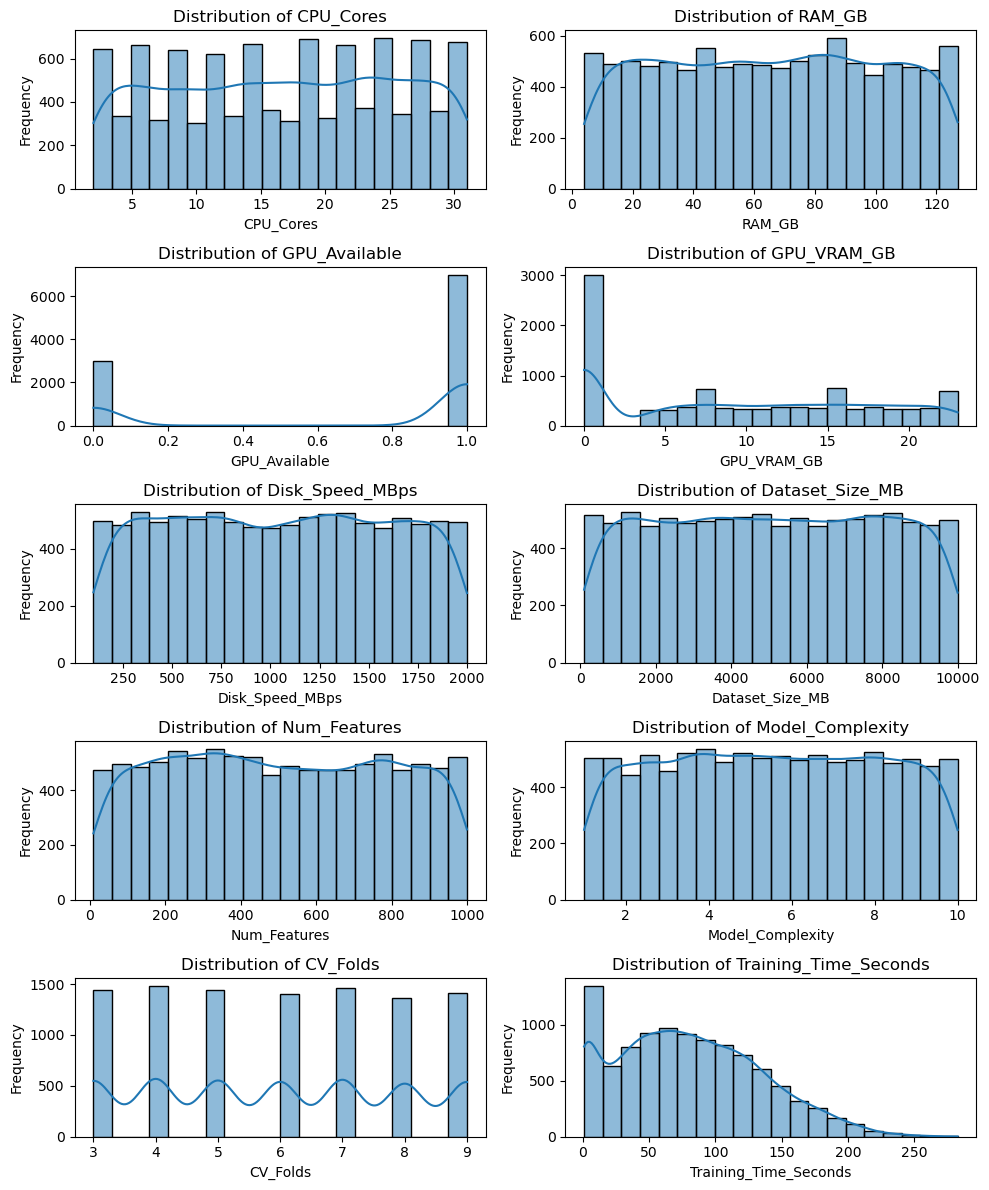

In [12]:
columns = df.columns

rows, cols = 5, 2
fig, axes = plt.subplots(rows, cols, figsize=(10,12), tight_layout=True)
axes = axes.ravel()

for i, feature in enumerate(columns):
    sns.histplot(df[feature], kde=True, bins=20, ax=axes[i])
    axes[i].set_title(f"Distribution of {feature}")
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')

for j in range(len(columns), len(axes)):
    fig.delaxes(axes[j])

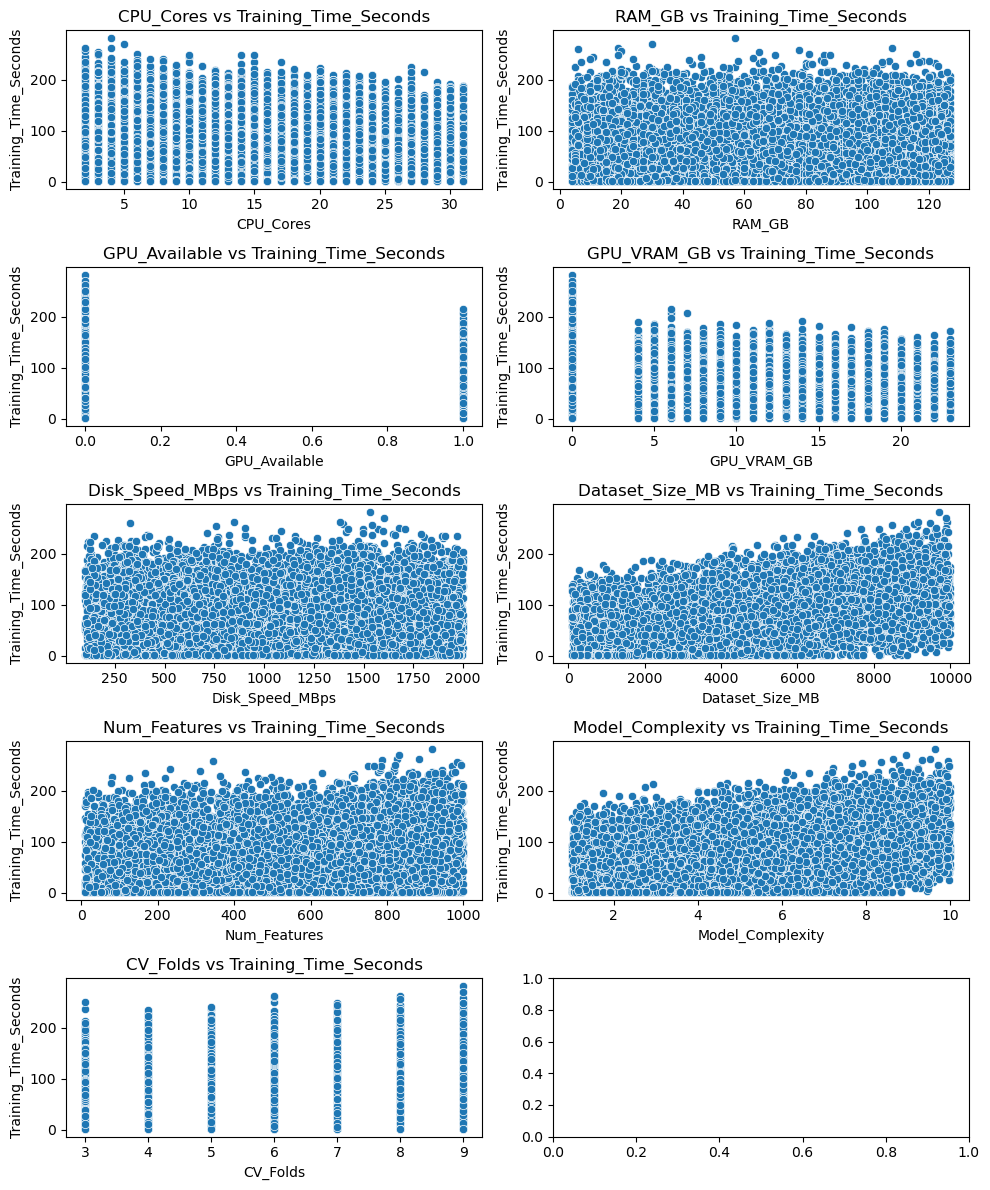

In [17]:
fig, axes = plt.subplots(rows, cols, figsize=(10,12), tight_layout=True)
axes = axes.ravel()

target = 'Training_Time_Seconds'

for i, feature in enumerate(columns):
    if feature != target:
        sns.scatterplot(df, x=feature, y=target, ax=axes[i])
        axes[i].set_title(f"{feature} vs {target}")
        axes[i].set_xlabel(feature)
        axes[i].set_ylabel(target)



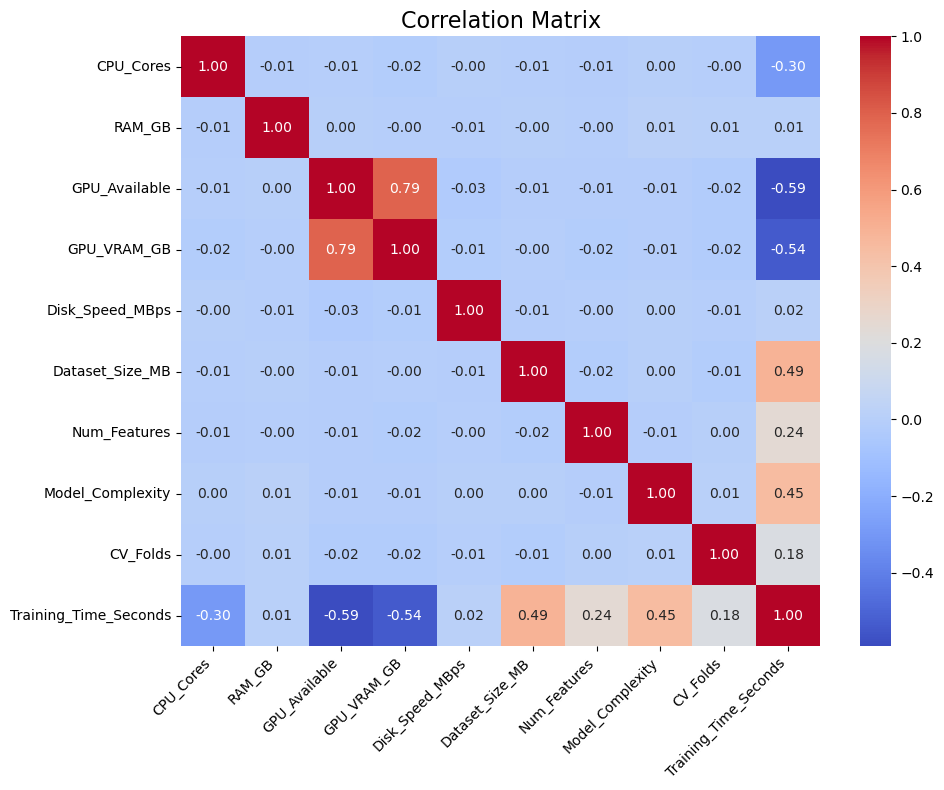

In [20]:
plt.figure(figsize=(10, 8))  
sns.heatmap(
    df.corr(), 
    annot=True, 
    fmt=".2f",  
    cmap='coolwarm', 
    cbar=True,  
    annot_kws={"size": 10} 
)
plt.title("Correlation Matrix", fontsize=16)  
plt.xticks(rotation=45, ha='right', fontsize=10) 
plt.yticks(fontsize=10) 
plt.tight_layout() 
plt.show()